### NIF Hydro Reader

##### F. S. Tsung

##### 2018



In [1]:
# This box imports needed libraries
#
#

import pandas
import numpy as np

# needed if you want to interpolate and get a lineout

import scipy

In [2]:
import os

import ipywidgets as widgets


class FileBrowser(object):
    def __init__(self):
        self.path = os.getcwd()
        self._update_files()
        
    def _update_files(self):
        self.files = list()
        self.dirs = list()
        if(os.path.isdir(self.path)):
            for f in os.listdir(self.path):
                ff = self.path + "/" + f
                if os.path.isdir(ff):
                    self.dirs.append(f)
                else:
                    self.files.append(f)
        
    def widget(self):
        box = widgets.VBox()
        self._update(box)
        return box
    
    def _update(self, box):
        
        def on_click(b):
            if b.description == '..':
                self.path = os.path.split(self.path)[0]
            else:
                self.path = self.path + "/" + b.description
            self._update_files()
            self._update(box)
        
        buttons = []
        if self.files:
            button = widgets.Button(description='..', background_color='#d0d0ff')
            button.on_click(on_click)
            buttons.append(button)
        for f in self.dirs:
            button = widgets.Button(description=f, background_color='#d0d0ff')
            button.on_click(on_click)
            buttons.append(button)
        for f in self.files:
            button = widgets.Button(description=f)
            button.on_click(on_click)
            buttons.append(button)
        box.children = tuple([widgets.HTML("<h2>%s</h2>" % (self.path,))] + buttons)

# example usage:
#   f = FileBrowser()
#   f.widget()
#   <interact with widget, select a path>
# in a separate cell:
#   f.path # returns the selected path

In [3]:
filename=FileBrowser()
filename.widget()

In [202]:
print(filename.path)

/Users/franktsung/Documents/work/LLNL-2018/hydro-files/PlasmaMaps_02011805_Au_RELEASED_SEND_7ns.txt


In [4]:


f=open(filename.path)
for i in range(3):
    f.readline()

sizes=np.zeros(2)
nx=int(f.readline())
sizes[0]=int(nx)
f.readline()
# print(nx)
ny=int(f.readline())
# print(ny)
sizes[1]=int(ny)
# print(sizes)
for i in range(16):
    f.readline()
    
test=pandas.read_csv(f,sep='\s+')

In [5]:
dx=test["x(cm)"][1]-test["x(cm)"][0]
dy=test["z(cm)"][nx+1]-test["z(cm)"][0]


# print(dx)
# print(dy)

xaxis=np.arange(nx)*dx
yaxis=np.arange(ny)*dy

0.0025
0.0025


In [6]:
ne=np.zeros((nx,ny))
te=np.zeros((nx,ny))
ni=np.zeros((nx,ny))
ti=np.zeros((nx,ny))

vr=np.zeros((nx,ny))
vz=np.zeros((nx,ny))

frach=np.zeros((nx,ny))
frache=np.zeros((nx,ny))
fracc=np.zeros((nx,ny))

for j in range(0,ny):
    for i in range(0,nx):
        ne[i,j]=test["N_e_(/cc)"][i+j*nx]
        te[i,j]=test["T_e_(keV)"][i+j*nx]
        ni[i,j]=test["N_i_(/cc)"][i+j*nx]
        ti[i,j]=test["T_i_(keV)"][i+j*nx]
        vr[i,j]=test["V_r_(cm/s)"][i+j*nx]
        vz[i,j]=test["V_z_(cm/s)"][i+j*nx]
        
        frach[i,j]=test["Fracth"][i+j*nx]
        frache[i,j]=test["Fracthe"][i+j*nx]
        
        

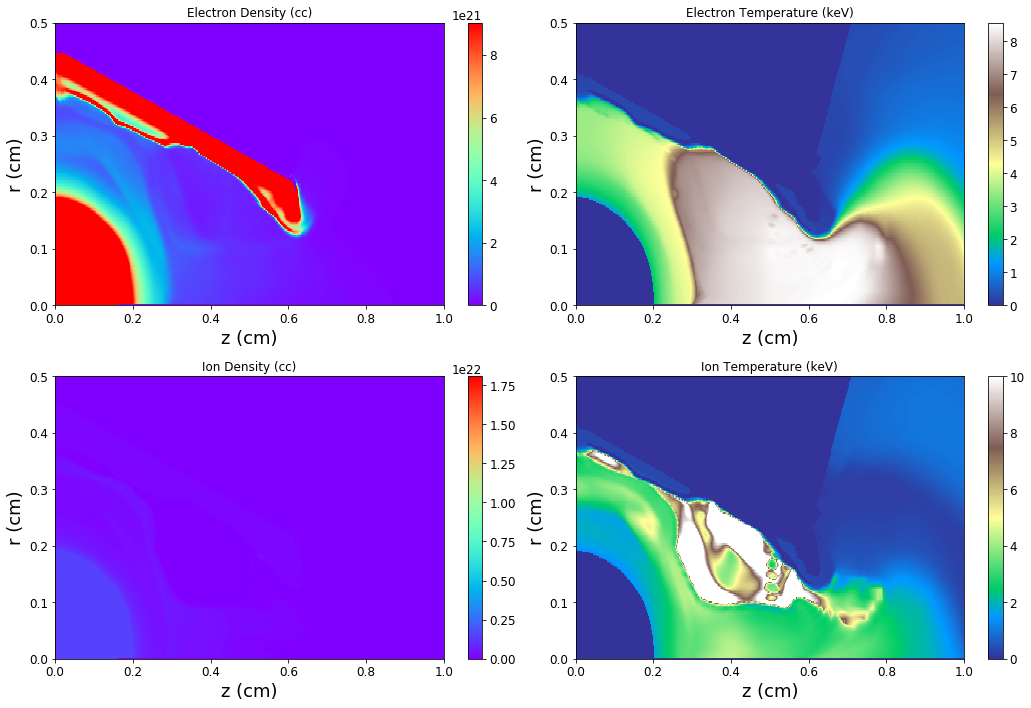

In [24]:
from pylab import *
# import matplotlib
# matplotlib.use('pgf')

SMALL_SIZE = 12
MEDIUM_SIZE = 18
LARGE_SIZE = 24

# rc('text',usetex=True)
# rc('font', family='serif')
rc('font', size=SMALL_SIZE)
rc('axes', titlesize=SMALL_SIZE)
rc('axes', labelsize = MEDIUM_SIZE)
rc('legend',fontsize=MEDIUM_SIZE)
rc('figure', titlesize=SMALL_SIZE)


mom=figure(1,figsize=(15,10))
# mom.suptitle(filename.path)

plot1=subplot(221)
pcolor(yaxis,xaxis,ne,cmap='rainbow')
colorbar()
plot1.set_title('Electron Density (cc)')
plot1.set_xlabel('z (cm)')
plot1.set_ylabel('r (cm)')
tight_layout()

plot2=subplot(222)
pcolor(yaxis,xaxis,te,cmap='terrain')
colorbar()
plot2.set_title('Electron Temperature (keV)')
plot2.set_xlabel('z (cm)')
plot2.set_ylabel('r (cm)')
tight_layout()

plot3=subplot(223)
pcolor(yaxis,xaxis,ni,cmap='rainbow')
colorbar()
plot3.set_title('Ion Density (cc)')
plot3.set_xlabel('z (cm)')
plot3.set_ylabel('r (cm)')
tight_layout()

plot4=subplot(224)
pcolor(yaxis,xaxis,ti,cmap='terrain')
colorbar()
plot4.set_title('Ion Temperature (keV)')
plot4.set_xlabel('z (cm)')
plot4.set_ylabel('r (cm)')
tight_layout()

show()

In [25]:
from scipy import interpolate
te_interp= interpolate.interp2d(yaxis,xaxis,te,kind='cubic')
ne_interp= interpolate.interp2d(yaxis,xaxis,ne,kind='cubic')

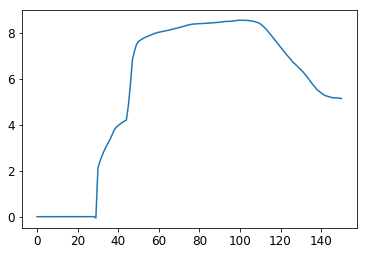

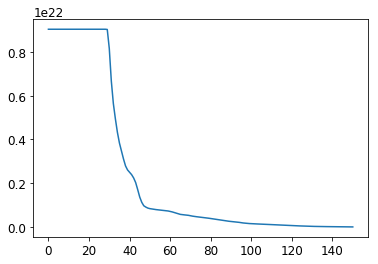

In [26]:
ybegin=0
yend=1.0

xbegin=0.05
xend=0.005

npoints = 151

te_lineout=np.zeros(npoints)
ne_lineout=np.zeros(npoints)


xinterv=xend-xbegin

yinterv=yend-ybegin
for i in range(0,npoints):
    te_lineout[i]=te_interp(ybegin+yinterv/float(npoints-1)*i,xbegin+xinterv/float(npoints-1)*i)
    ne_lineout[i]=ne_interp(ybegin+yinterv/float(npoints-1)*i,xbegin+xinterv/float(npoints-1)*i)
    
plot(te_lineout)
show()

plot(ne_lineout)
show()